In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/explore-car-performance-fuel-efficiency-data/car_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/explore-car-performance-fuel-efficiency-data/car_data.csv')

In [3]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [4]:
df.shape

(550, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [6]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,21.087591,23.748175,5.315693,2.931752,28.346715,2019.009124
std,5.328307,5.268521,1.759999,1.248419,5.279764,3.167175
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,55.000000,52.000000,12.000000,6.800000,52.000000,2024.000000


In [18]:
df_cat = ['class','drive','fuel_type']
df_cont = df.select_dtypes(exclude = 'object')


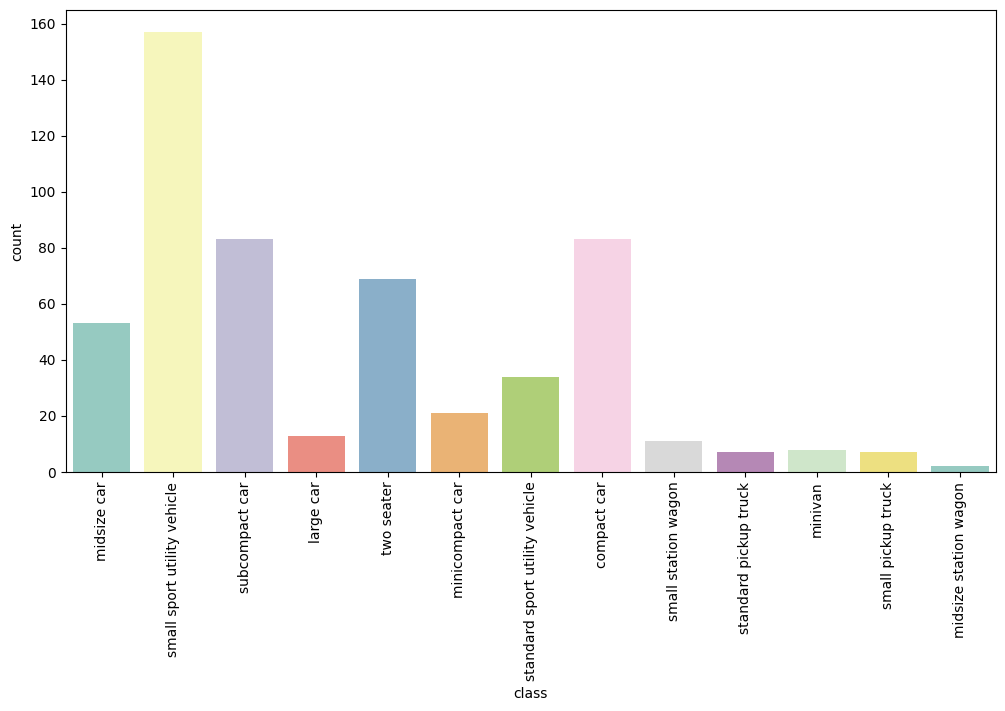

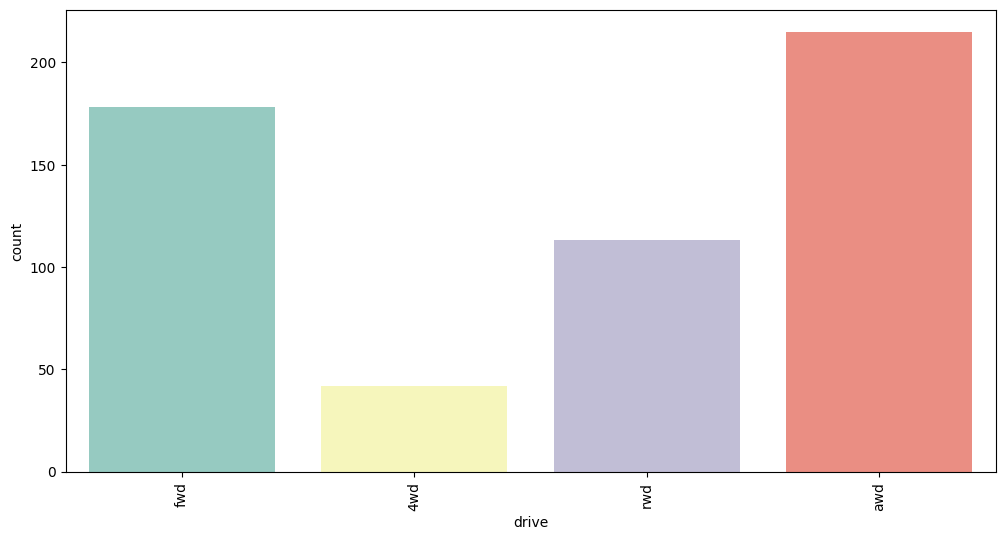

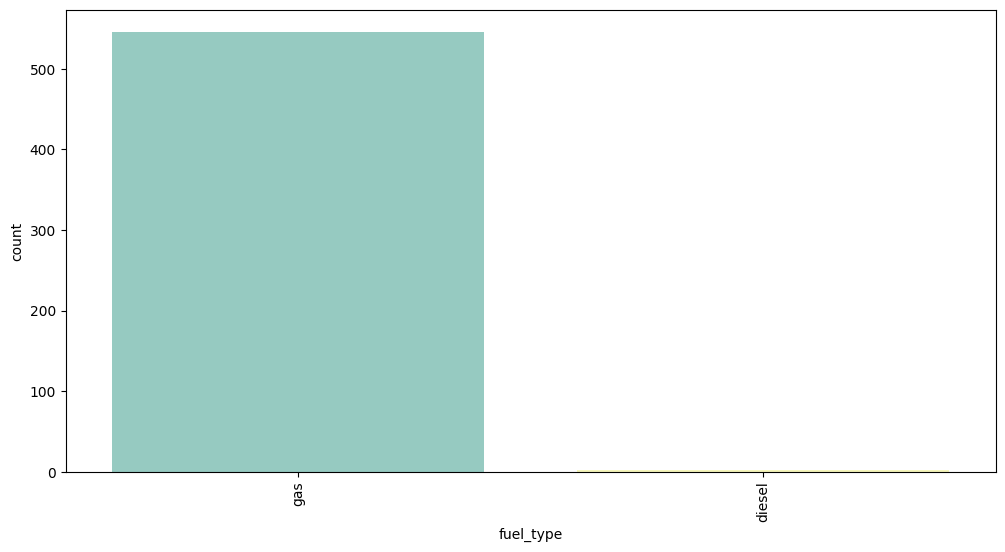

In [23]:
for col in df_cat:
    plt.figure(figsize=(12,6))
    sns.countplot(x = col, data = df,palette = 'Set3')
    plt.xticks(rotation = 90)
    plt.show()

Insights 1 : Small Sport utility cater to the most popular

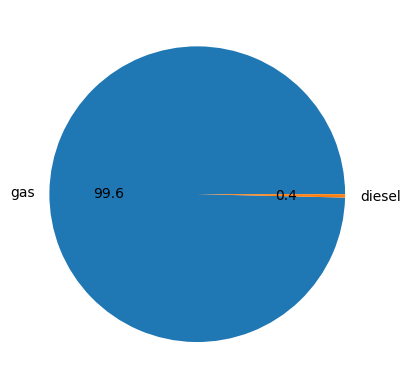

In [28]:
df['fuel_type'].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)
plt.show()

Insights 2 : 99.6% of the vehicles are of Gas Vehicle